In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
ExpMat = pd.read_csv("dat/Jon_data/energy-exp_level.csv", index_col="ROW")
ExpMat2, ExpZscoreMat2, ExpMatNorm2, ExpZscoreMatNorm2 = LoadExpressionMatrices(
                        ExpMat = "../dat/allen-mouse-exp/new-energy-conn-model.csv", 
                        ExpZscoreMat = "../dat/allen-mouse-exp/new-energy-conn-zscore.csv",
                        ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv",
                        ExpZscoreMatNorm = "../dat/allen-mouse-exp/energy-zscore-neuronorm.csv")
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

In [2]:
def CountMut(DF):
    N_LGD, N_mis, N_Dmis, N_syn = 0,0,0,0
    for i, row in DF.iterrows():
        GeneEff = row["GeneEff"].split(";")[0]
        if GeneEff in ["frameshift", "splice_acceptor", "splice_donor", "start_lost", "stop_gained", "stop_lost"]:
            N_LGD += 1
        elif GeneEff == "missense":
            N_mis += 1
            row["REVEL"] = row["REVEL"].split(";")[0]
            if row["REVEL"] != ".":
                if float(row["REVEL"]) > 0.5:
                    N_Dmis += 1
        elif GeneEff == "synonymous":
            N_syn += 1
    return N_LGD, N_mis, N_Dmis, N_syn
    #return N_LGD, N_Dmis

## 0. xxx

In [45]:
DNV_Muts = pd.read_csv("../dat/genes/SPARK/CodingDNVs.txt", delimiter="\t")

In [46]:
SPARK_DNV = DNV_Muts[DNV_Muts["Cohort"]=="SPARK"]
print(SPARK_DNV.shape)

(13755, 67)


In [48]:
SPARK_DNV.to_csv("../dat/genes/SPARK/ASD_OnlySPARK_DNVs.txt", sep="\t", index=False)

In [41]:
DNV_SP = pd.read_csv("../dat/genes/SPARK/SampTable.txt", delimiter="\t")

In [42]:
DNV_SP.head(2)

,Cohort,FamID,FamType,IID,Sex,Pheno,ID
0,ASC,UCD_11791,Simplex,002-09-110644,Male,Affected,No
1,ASC,UCD_10455,Multiplex,003-05-102508,Female,Affected,No


In [44]:
SPARK_SP = DNV_SP[DNV_SP["Cohort"]=="SPARK"]
print(SPARK_SP.shape)

(10097, 7)


In [9]:
SPARK_SP[SPARK_SP["Pheno"]=="Affected"]

,Cohort,FamID,FamType,IID,Sex,Pheno,ID
8109,SPARK,SF0000027,Multiplex,SP0000027,Male,Affected,No
8110,SPARK,SF0000027,Multiplex,SP0000034,Male,Affected,No
8111,SPARK,SF0000035,Simplex,SP0000035,Male,Affected,No
8112,SPARK,SF0000027,Multiplex,SP0000063,Female,Affected,No
8113,SPARK,SF0000076,Simplex,SP0000076,Male,Affected,No
...,...,...,...,...,...,...,...
18199,SPARK,SF0153060,Multiplex,SP0153060,Male,Affected,No
18200,SPARK,SF0153750,Simplex,SP0153750,Female,Affected,Yes
18201,SPARK,SF0154149,Simplex,SP0154149,Female,Affected,No
18203,SPARK,SF0154208,Simplex,SP0154208,Male,Affected,No


In [12]:
SPARK_SP.to_csv("../dat/genes/ASD_OnlySPARK_Trios.txt", sep="\t", index=False)

In [33]:
SPs = SPARK_SP["IID"].values

In [36]:
DupPairs = pd.read_csv("../dat/genes/SPARK/Samp_LikelyDupPairs.txt", sep="\t", header=None, names=None)
DupPairs_new = DupPairs[(DupPairs[0].isin(SPs)) & (DupPairs[1].isin(SPs))]
DupPairs_new.to_csv("../dat/genes/SPARK/SPARK_Samp_LikelyDupPairs.txt", sep="\t", index=False, header=False)

In [37]:
SibPairs = pd.read_csv("../dat/genes/SPARK/Samp_LikelySibPairs.txt", sep="\t", header=None, names=None)
SibPairs_new = SibPairs[(SibPairs[0].isin(SPs)) & (SibPairs[1].isin(SPs))]
SibPairs_new.to_csv("../dat/genes/SPARK/SPARK_Samp_LikelySibPairs.txt", sep="\t", index=False, header=False)

## 1. SIxx

In [51]:
DNV_West_DF = pd.read_csv("../dat/genes/SPARK/Spark_OnlyWEST_All.txt", delimiter="\t")
Spark_DNV_Mut = pd.read_csv("../dat/genes/ASD_OnlySPARK_DNVs.txt", delimiter="\t")

In [52]:
set(Spark_DNV_Mut["GeneEff"].values)

{'frameshift',
 'frameshift;frameshift',
 'inframe_deletion',
 'inframe_insertion',
 'missense',
 'missense;missense',
 'missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense;missense',
 'missense;synonymous',
 'protein_altering',
 'splice_acceptor',
 'splice_donor',
 'splice_donor;splice_donor',
 'splice_region',
 'splice_region;splice_region',
 'start_lost',
 'stop_gained',
 'stop_gained;missense',
 'stop_gained;stop_gained',
 'stop_lost',
 'stop_retained',
 'synonymous',
 'synonymous;missense',
 'synonymous;synonymous'}

In [55]:
Muts

,GeneID,HGNC,EntrezID,pLI,LOUEFbin,LOUEF,LoFOvsE,SynOvsE,sHet,forecASD,...,AllExpected,pAllEnrich,MisObserved,MisExpected,pMisEnrich,MisEvents,MisDist,pMisCluster,pMisComb,pDenovoWEST
0,ENSG00000169057,MECP2,4204,0.698089047724915,1,4.0700e-01,8.5755e-02,2.0282e+00,0.0882033728499718,0.659685863874346,...,0.030862147475845807,1.06E-15,2.3310000000000004,0.02324823948587133,1.11E-14,7,257.2,0.16,6.34E-14,1.06E-15


In [79]:
for i, row in DNV_West_DF.iterrows():
    HGNC = row["HGNC"]
    Muts = Spark_DNV_Mut[Spark_DNV_Mut["HGNC"]==HGNC]
    N_LGD, N_Dmis = CountMut(Muts)
    DNV_West_DF.loc[i, "dnLGD"] = N_LGD
    DNV_West_DF.loc[i, "dnDmis"] = N_Dmis

In [80]:
DNV_West_DF.head(2)

,GeneID,HGNC,EntrezID,pLI,LOUEFbin,LOUEF,LoFOvsE,SynOvsE,sHet,forecASD,...,MisObserved,MisExpected,pMisEnrich,MisEvents,MisDist,pMisCluster,pMisComb,pDenovoWEST,dnLGD,dnDmis
0,ENSG00000169057,MECP2,4204,0.698089047724915,1,4.0700e-01,8.5755e-02,2.0282e+00,0.0882033728499718,0.659685863874346,...,2.3310000000000004,0.02324823948587133,1.11E-14,7,257.2,0.16,6.34E-14,1.06E-15,2.0,7.0
1,ENSG00000251322,SHANK3,85358,0.999839619981909,0,1.2300e-01,3.9226e-02,1.2148e+00,.,0.896,...,1.197,0.13206389525852902,3.43E-06,5,1186.8,0.46,2.27E-05,1.00E-14,9.0,3.0


In [81]:
SPARK = DNV_West_DF.head(102)
SPARK_101 = set(SPARK["EntrezID"].values)

In [82]:
DNV_West_DF.to_csv("../dat/genes/SPARK/SPARK_Only_WEST_MutN.csv", index=False)

In [77]:
asc_df = pd.read_csv("../dat/genes/asd/asc_tada_RR.csv")
asc_101 = set(asc_df.head(102)["entrez_id"].values)

<Figure size 720x480 with 0 Axes>

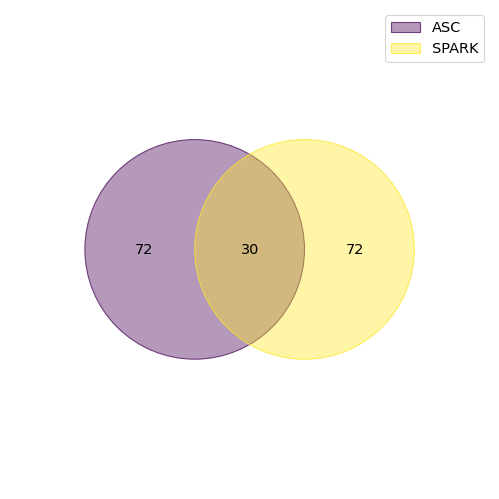

In [83]:
dat_dict = {"ASC": asc_101, "SPARK":set(SPARK["EntrezID"].values), }
plt.figure(dpi=120)
venn(dat_dict)

In [71]:
venn(SPARK_101, asc_101)

TypeError: venn_dispatch() got multiple values for argument 'func'

## XXX

In [2]:
phenotype = pd.read_excel("../dat/genes/SPARK/Data_DiscovSampInfo.xlsx", sheet_name="SPARK", header=1)

In [3]:
phenotype.head(2)

,FelicianoP2019,Exome,SNPArray,FamID,FamIDOrig,FamHist,IID,Role,Sex,Father,...,ProbEUR,ProbAFR,ProbNAT,ProbSAS,ProbEAS,Denovo,TDT,TDTchrX,PseudoCC,PseudoCCchrX
0,.,x,x,SF0000003,.,Simplex,SP0000002,Mother,Female,.,...,0.288,0.382,0.317,0.005,0.009,.,duo,duo,control,control
1,.,x,x,SF0000003,.,Simplex,SP0000003,Proband,Male,.,...,0.355,0.243,0.378,0.000,0.024,.,duo,duo,case,.


In [39]:
proband = phenotype[(phenotype["Role"]=="Proband") & (phenotype["ASD"]==True)]
proband = proband[proband["FamHist"]=="Simplex"]
CognitImpair  = proband[proband["CognitImpair"]=="True"]
UnCognitImpair = proband[proband["CognitImpair"]=="False"]
Probands_CognitImpair = CognitImpair["IID"].values
Probands_UnCognitImpair = UnCognitImpair["IID"].values
print("N Cog: %d; N Uncog: %d"%(len(Probands_CognitImpair), len(Probands_UnCognitImpair)))

N Cog: 1920; N Uncog: 5493


In [40]:
DNVs = pd.read_csv("../dat/genes/SPARK/ASD_Discov_DNVs.txt", delimiter="\t")
Cog_DNVs = DNVs[DNVs["IID"].isin(Probands_CognitImpair)]
UnCog_DNVs = DNVs[DNVs["IID"].isin(Probands_UnCognitImpair)]

In [41]:
len(set(Cog_DNVs["IID"].values))

995

In [42]:
len(set(UnCog_DNVs["IID"].values))

2881

In [43]:
# Calculate Enrichment Rate
All_Genes = pd.read_csv("../dat/genes/asd/TADA.SPARK.ONLY.txt", delimiter="\t")
Cog_LGD_Exp = 2 * len(Probands_CognitImpair) * All_Genes["mutLGD"].sum()
Cog_Dmis_Exp = 2 * len(Probands_CognitImpair) * All_Genes["mutDmis"].sum()
Cog_Dmis_Exp = 2 * len(Probands_CognitImpair) * All_Genes["mutDmis"].sum()

UnCog_LGD_Exp = 2 * len(Probands_UnCognitImpair) * All_Genes["mutLGD"].sum()
UnCog_Dmis_Exp = 2 * len(Probands_UnCognitImpair) * All_Genes["mutDmis"].sum()
UnCog_Dmis_Exp = 2 * len(Probands_UnCognitImpair) * All_Genes["mutDmis"].sum()

print(Cog_LGD_Exp, Cog_Dmis_Exp)
print(UnCog_LGD_Exp, UnCog_Dmis_Exp)

195.00867395327617 304.4487465287477
557.9076281382011 871.008835772089


In [44]:
CountMut(Cog_DNVs)

(282, 302)

In [45]:
CountMut(UnCog_DNVs)

(598, 730)

In [46]:
# Calculate Mutation Count in Candidate Genes
Spark_Meta = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/dat/genes/asd/spark_Meta_top_genes.xlsx")
Spark_Meta_Cog = Spark_Meta.copy(deep=True)
Spark_Meta_UnCog = Spark_Meta.copy(deep=True)

for i, row in Spark_Meta_Cog.iterrows():
    HGNC = row["HGNC"]
    Muts = Cog_DNVs[Cog_DNVs["HGNC"]==HGNC]
    N_LGD, N_Dmis = CountMut(Muts)
    Spark_Meta_Cog.loc[i, "AutismMerged_LoF"] = N_LGD
    Spark_Meta_Cog.loc[i, "AutismMerged_Dmis_REVEL0.5"] = N_Dmis
    
for i, row in Spark_Meta_UnCog.iterrows():
    HGNC = row["HGNC"]
    Muts = UnCog_DNVs[UnCog_DNVs["HGNC"]==HGNC]
    N_LGD, N_Dmis = CountMut(Muts)
    Spark_Meta_UnCog.loc[i, "AutismMerged_LoF"] = N_LGD
    Spark_Meta_UnCog.loc[i, "AutismMerged_Dmis_REVEL0.5"] = N_Dmis    

In [47]:
_, Cog_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta_Cog, out = "dat/bias2/Cog.gene.weights.csv")
Cog_Match = MakeMatchDF(Cog_gene2MutN, N=1000)
_, Uncog_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta_UnCog, out = "dat/bias2/Uncog.gene.weights.csv")
Uncog_Match = MakeMatchDF(Uncog_gene2MutN, N=1000)

In [48]:
Cog_Meta_Spec = AvgSTRZ_Weighted(ExpZscoreMat, Cog_gene2MutN, Match_DF=Cog_Match, Method = 2,
                                              csv_fil = "dat/bias2/Cog.Spec.bias.csv")
RD_Agg_avgZ_RD = RegionDistributions(Cog_Meta_Spec.set_index("STR"), show=True)

Midbrain 	 1 	 Anterior_pretectal_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA3; Field_CA2
Hippocampal_formation 	 4 	 Subiculum_ventral_part; Parasubiculum; Presubiculum; Subiculum_dorsal_part
Olfactory_areas 	 4 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Taenia_tecta; Accessory_olfactory_bulb
Thalamus 	 5 	 Nucleus_of_reuniens; Central_lateral_nucleus_of_the_thalamus; Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Submedial_nucleus_of_the_thalamus
Striatum 	 3 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Caudoputamen
Isocortex 	 23 	 Prelimbic_area; Infralimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Anterior_cingulate_area_dorsal_part; Secondary_motor_area; Primary_visual_area; Anteromedial_visual_area; Visceral_area; Retrosplenial_area_lateral_agranular_part; Primary_somatosensory_area_lower_limb; Orbital_area_medial_part; Primary_motor_area; Agranular_insular_area_posterior_part; Lateral_visual

In [49]:
Uncog_Meta_Spec = AvgSTRZ_Weighted(ExpZscoreMat, Uncog_gene2MutN, Match_DF=Uncog_Match, Method = 2,
                                              csv_fil = "dat/bias2/Uncog.Spec.bias.csv")
RD_Agg_avgZ_RD = RegionDistributions(Uncog_Meta_Spec.set_index("STR"), show=True)

Midbrain 	 1 	 Anterior_pretectal_nucleus
Hippocampal_region 	 4 	 Field_CA1; Dentate_gyrus; Field_CA2; Field_CA3
Hippocampal_formation 	 4 	 Subiculum_dorsal_part; Subiculum_ventral_part; Parasubiculum; Presubiculum
Olfactory_areas 	 4 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Piriform_area
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Lateral_dorsal_nucleus_of_thalamus; Posterior_complex_of_the_thalamus; Dorsal_part_of_the_lateral_geniculate_complex
Striatum 	 4 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Caudoputamen; Central_amygdalar_nucleus
Isocortex 	 23 	 Orbital_area_lateral_part; Agranular_insular_area_ventral_part; Primary_motor_area; Orbital_area_ventrolateral_part; Prelimbic_area; Gustatory_areas; Agranular_insular_area_dorsal_part; Primary_visual_area; Primary_somatosensory_area_upper_limb; Infralimbic_area; Primary_somatosensory_area_lower_limb; Primary_somatosensory_area_trunk; Secondary_

In [50]:
Cog_Meta_Spec = Cog_Meta_Spec.set_index("STR")
Uncog_Meta_Spec = Uncog_Meta_Spec.set_index("STR")

In [51]:
g = LoadConnectome2() # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")

In [52]:
state = run_CircuitOpt(g, EdgeWeightsDict, Cog_Meta_Spec, False, False)


 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.00001          0.61     0.00%     0.00%      20000.00     0:01:22     0:00:00

Done


In [53]:
xx = RegionDistributions(Cog_Meta_Spec, show=True, states=state)

Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA3; Field_CA2
Hippocampal_formation 	 4 	 Subiculum_ventral_part; Parasubiculum; Presubiculum; Subiculum_dorsal_part
Olfactory_areas 	 4 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Taenia_tecta; Accessory_olfactory_bulb
Thalamus 	 4 	 Nucleus_of_reuniens; Central_lateral_nucleus_of_the_thalamus; Lateral_posterior_nucleus_of_the_thalamus; Submedial_nucleus_of_the_thalamus
Striatum 	 1 	 Nucleus_accumbens
Isocortex 	 18 	 Prelimbic_area; Infralimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Anterior_cingulate_area_dorsal_part; Secondary_motor_area; Primary_visual_area; Anteromedial_visual_area; Retrosplenial_area_lateral_agranular_part; Primary_somatosensory_area_lower_limb; Orbital_area_medial_part; Lateral_visual_area; Anterior_cingulate_area_ventral_part; Posterolateral_visual_area; Agranular_insular_area_ventral_part; Posterior_parietal_association_areas; Anterolateral_visual_area; Primary_som

In [54]:
state2 = run_CircuitOpt(g, EdgeWeightsDict, Uncog_Meta_Spec, False, False)


 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.00001          0.64     0.00%     0.00%      20000.00     0:01:24     0:00:00

Done


In [55]:
xx2 = RegionDistributions(Uncog_Meta_Spec, show=True, states=state2)

Midbrain 	 1 	 Anterior_pretectal_nucleus
Hippocampal_region 	 4 	 Field_CA1; Dentate_gyrus; Field_CA2; Field_CA3
Hippocampal_formation 	 4 	 Subiculum_dorsal_part; Subiculum_ventral_part; Parasubiculum; Presubiculum
Olfactory_areas 	 4 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Piriform_area
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Lateral_dorsal_nucleus_of_thalamus; Posterior_complex_of_the_thalamus; Dorsal_part_of_the_lateral_geniculate_complex
Striatum 	 1 	 Caudoputamen
Isocortex 	 23 	 Orbital_area_lateral_part; Agranular_insular_area_ventral_part; Primary_motor_area; Orbital_area_ventrolateral_part; Prelimbic_area; Gustatory_areas; Agranular_insular_area_dorsal_part; Primary_visual_area; Primary_somatosensory_area_upper_limb; Infralimbic_area; Primary_somatosensory_area_lower_limb; Primary_somatosensory_area_trunk; Secondary_motor_area; Frontal_pole_cerebral_cortex; Posterior_parietal_association_areas

#### Jon's Version

In [66]:
spark_mut_count = pd.read_csv("../dat/genes/SPARK/spark-cognitive_impairment.csv")
HighFunc_Dict = dict(zip(spark_mut_count["gen"].values, spark_mut_count["phen1.weight"].values)) 
LowFunc_Dict = dict(zip(spark_mut_count["gen"].values, spark_mut_count["phen2.weight"].values)) 
HF_Match = MakeMatchDF(HighFunc_Dict, N=1000)
LF_Match = MakeMatchDF(LowFunc_Dict, N=1000)

In [67]:
HF_Meta_Spec = AvgSTRZ_Weighted(ExpZscoreMat, HighFunc_Dict, Match_DF=HF_Match, Method = 2,
                                              csv_fil = "dat/bias2/HF.Spec.bias.csv")
RD_Agg_avgZ_RD = RegionDistributions(HF_Meta_Spec.set_index("STR"), show=True)

Midbrain 	 2 	 Anterior_pretectal_nucleus; Nucleus_of_the_optic_tract
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Hippocampal_formation 	 4 	 Subiculum_dorsal_part; Subiculum_ventral_part; Parasubiculum; Presubiculum
Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Dorsal_peduncular_area
Thalamus 	 6 	 Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Mediodorsal_nucleus_of_thalamus; Parataenial_nucleus; Subparafascicular_nucleus_magnocellular_part; Submedial_nucleus_of_the_thalamus
Striatum 	 6 	 Intercalated_amygdalar_nucleus; Central_amygdalar_nucleus; Nucleus_accumbens; Lateral_septal_nucleus_ventral_part; Lateral_septal_nucleus_rostral_rostroventral_part; Caudoputamen
Isocortex 	 20 	 Orbital_area_lateral_part; Agranular_insular_area_ventral_part; Orbital_area_ventrolateral_part; Primary_visual_area; Prelimbic_area; Primary_motor_area; Frontal_pole_cerebral_cortex; Infralimbic_area; Gustatory_areas; Primary_so

In [68]:
LF_Meta_Spec = AvgSTRZ_Weighted(ExpZscoreMat, LowFunc_Dict, Match_DF=LF_Match, Method = 2,
                                              csv_fil = "dat/bias2/LF.Spec.bias.csv")
RD_Agg_avgZ_RD = RegionDistributions(LF_Meta_Spec.set_index("STR"), show=True)

Midbrain 	 1 	 Anterior_pretectal_nucleus
Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Hippocampal_formation 	 2 	 Subiculum_ventral_part; Subiculum_dorsal_part
Olfactory_areas 	 4 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Taenia_tecta
Thalamus 	 7 	 Lateral_posterior_nucleus_of_the_thalamus; Nucleus_of_reuniens; Parafascicular_nucleus; Submedial_nucleus_of_the_thalamus; Rhomboid_nucleus; Mediodorsal_nucleus_of_thalamus; Central_lateral_nucleus_of_the_thalamus
Striatum 	 3 	 Nucleus_accumbens; Caudoputamen; Intercalated_amygdalar_nucleus
Isocortex 	 23 	 Prelimbic_area; Infralimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Anteromedial_visual_area; Primary_somatosensory_area_lower_limb; Primary_visual_area; Anterior_cingulate_area_dorsal_part; Orbital_area_medial_part; Secondary_motor_area; Retrosplenial_area_lateral_agranular_part; Visceral_area; Primary_motor_area; Agranular_insular_area_posterio

In [69]:
HF_Meta_Spec = HF_Meta_Spec.set_index("STR")
LF_Meta_Spec = LF_Meta_Spec.set_index("STR")
HF_states = run_CircuitOpt(g, EdgeWeightsDict, HF_Meta_Spec, False, False)
LF_states = run_CircuitOpt(g, EdgeWeightsDict, LF_Meta_Spec, False, False)


 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.00001          0.65     0.00%     0.00%      20000.00     0:01:21     0:00:00
 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.79433          0.78    98.50%    53.50%        400.00     0:00:01     0:01:10

Done


     0.00001          0.58     0.00%     0.00%      20000.00     0:01:24     0:00:00

Done


In [70]:
xx1 = RegionDistributions(HF_Meta_Spec, show=True, states=HF_states)

Hippocampal_region 	 4 	 Dentate_gyrus; Field_CA1; Field_CA2; Field_CA3
Hippocampal_formation 	 4 	 Subiculum_dorsal_part; Subiculum_ventral_part; Parasubiculum; Presubiculum
Olfactory_areas 	 3 	 Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Dorsal_peduncular_area
Thalamus 	 4 	 Lateral_posterior_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parataenial_nucleus; Submedial_nucleus_of_the_thalamus
Striatum 	 1 	 Caudoputamen
Isocortex 	 19 	 Orbital_area_lateral_part; Agranular_insular_area_ventral_part; Orbital_area_ventrolateral_part; Primary_visual_area; Prelimbic_area; Primary_motor_area; Frontal_pole_cerebral_cortex; Infralimbic_area; Gustatory_areas; Primary_somatosensory_area_lower_limb; Primary_somatosensory_area_trunk; Agranular_insular_area_dorsal_part; Posterior_parietal_association_areas; Retrosplenial_area_lateral_agranular_part; Posterolateral_visual_area; Secondary_motor_area; Anterior_cingulate_area_dorsal_part; posteromedial_visual_area; Anteromedial

In [71]:
xx2 = RegionDistributions(LF_Meta_Spec, show=True, states=LF_states)

Hippocampal_formation 	 1 	 Subiculum_dorsal_part
Olfactory_areas 	 4 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Taenia_tecta
Thalamus 	 6 	 Lateral_posterior_nucleus_of_the_thalamus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Rhomboid_nucleus; Mediodorsal_nucleus_of_thalamus; Central_lateral_nucleus_of_the_thalamus
Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Isocortex 	 23 	 Prelimbic_area; Infralimbic_area; Orbital_area_lateral_part; Orbital_area_ventrolateral_part; Anteromedial_visual_area; Primary_somatosensory_area_lower_limb; Primary_visual_area; Anterior_cingulate_area_dorsal_part; Orbital_area_medial_part; Secondary_motor_area; Retrosplenial_area_lateral_agranular_part; Visceral_area; Primary_motor_area; Agranular_insular_area_posterior_part; Lateral_visual_area; Agranular_insular_area_ventral_part; Gustatory_areas; Anterior_cingulate_area_ventral_part; Posterior_parietal_association_areas; posteromedial_visual_area; Primary_

In [83]:
_ = HF_Meta_Spec.head(50)[HF_Meta_Spec["REGION"]=="Isocortex"].index.values.sort()

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [86]:
sorted(HF_Meta_Spec.head(50)[HF_Meta_Spec["REGION"]=="Isocortex"].index.values)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


['Agranular_insular_area_dorsal_part',
 'Agranular_insular_area_ventral_part',
 'Anterior_cingulate_area_dorsal_part',
 'Anteromedial_visual_area',
 'Frontal_pole_cerebral_cortex',
 'Gustatory_areas',
 'Infralimbic_area',
 'Orbital_area_lateral_part',
 'Orbital_area_ventrolateral_part',
 'Posterior_parietal_association_areas',
 'Posterolateral_visual_area',
 'Prelimbic_area',
 'Primary_motor_area',
 'Primary_somatosensory_area_lower_limb',
 'Primary_somatosensory_area_trunk',
 'Primary_somatosensory_area_upper_limb',
 'Primary_visual_area',
 'Retrosplenial_area_lateral_agranular_part',
 'Secondary_motor_area',
 'posteromedial_visual_area']

In [ ]:
Anteromedial_visual_area

In [ ]:
Posterolateral_visual_area
Primary_somatosensory_area_upper_limb
Primary_visual_area
posteromedial_visual_area
Retrosplenial_area_lateral_agranular_part

## Top50 

### Select Siblings

In [3]:
ASD_Discov_Muts = pd.read_csv("../dat/genes/SPARK/ASD_Discov_DNVs.txt", delimiter="\t")
ASD_Rep_Muts = pd.read_csv("../dat/genes/SPARK/ASD_Rep_DNVs.txt", delimiter="\t")
ASD_Discov_Trios = pd.read_csv("../dat/genes/SPARK/ASD_Discov_Trios.txt", delimiter="\t")
ASD_Rep_Trios = pd.read_csv("../dat/genes/SPARK/ASD_Rep_Trios.txt", delimiter="\t")

In [4]:
ASD_Discov_Muts.head(2)

,Cohort,FamID,IID,Sex,Pheno,DNASource,VarID,Chrom,Position,Ref,...,pExt_HBDR,HGNCv24,DS_AG,DS_AL,DS_DG,DS_DL,DP_AG,DP_AL,DP_DG,DP_DL
0,MSSNG,FAM_D4S2Z,D4S2Z-01,Male,Affected,.,10:102239623:C:T,10,102239623,C,...,1,WNT8B,0.0038,0,0,0,28,-21,28,-43
1,MSSNG,FAM_2-1540-003,2-1540-003,Male,Affected,Blood,10:102689078:G:C,10,102689078,G,...,0.73,SLF2,0,0,0.0001,0,-4,1,34,1


In [5]:
ASD_Discov_Sib = ASD_Discov_Trios[ASD_Discov_Trios["Pheno"]=="Unaffected"]["IID"].values
ASD_Rep_Sib = ASD_Rep_Trios[ASD_Rep_Trios["Pheno"]=="Unaffected"]["IID"].values
print(len(ASD_Discov_Sib), len(ASD_Rep_Sib))

5768 2499


In [6]:
Combined_siblings = np.concatenate((ASD_Discov_Sib, ASD_Rep_Sib), axis=None)
N_siblings = Combined_siblings.shape[0]
print(N_siblings)

8267


In [7]:
AllMuts = pd.concat([ASD_Discov_Muts, ASD_Rep_Muts])
AllMuts = AllMuts.reset_index()
AllSiblingMuts = AllMuts[AllMuts["IID"].isin(Combined_siblings)]

In [8]:
dat = []
for i, row in AllSiblingMuts.iterrows():
    GeneEff = row["GeneEff"].split(";")[0]
    if GeneEff in ["frameshift", "splice_acceptor", "splice_donor", "start_lost", "stop_gained", "stop_lost"]:
        dat.append(row.values)
    elif GeneEff == "missense":
        dat.append(row.values)
xx = pd.DataFrame(dat, columns = AllSiblingMuts.columns.values)

In [9]:
xx 

,index,Cohort,FamID,IID,Sex,Pheno,DNASource,VarID,Chrom,Position,...,pExt_HBDR,HGNCv24,DS_AG,DS_AL,DS_DG,DS_DL,DP_AG,DP_AL,DP_DG,DP_DL
0,24,MSSNG,FAM_MSSNG00124-003,MSSNG00124-004,Female,Unaffected,Blood,10:1170220:C:A,10,1170220,...,0.975,WDR37,0,0,0.0191,0,-30,-15,1,-26
1,33,MSSNG,FAM_F0193,REACH000363,Female,Unaffected,.,10:116361637:C:A,10,116361637,...,0.013,ABLIM1,0,0,0.0001,0,-15,50,6,1
2,44,MSSNG,FAM_MSSNG00102-003,MSSNG00102-005,Female,Unaffected,Blood,10:122280506:G:A,10,122280506,...,0.836,PLPP4,0.0948,0.1462,0,0,12,-23,-23,44
3,49,MSSNG,FAM_F0284,REACH000750,Male,Unaffected,.,10:126681378:C:T,10,126681378,...,1,CTBP2,0.0051,0.0016,0,0,-9,3,3,-25
4,65,MSSNG,FAM_1-0389-005,1-0389-005,Female,Unaffected,Blood,10:13656081:G:A,10,13656081,...,1,PRPF18,0,0,0,0.0006,-7,-9,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,751,NaN,SF0180601,SP0180602,Female,Unaffected,NaN,12:7060845:C:A,12,7060845,...,0.556,PTPN6,0.0001,0.0000,0.0000,0.0000,14,-4,49,-9
5296,752,NaN,SF0146252,SP0146253,Female,Unaffected,NaN,12:19422720:T:C,12,19422720,...,0.019,PLEKHA5,0.0000,0.0000,0.0000,0.0000,-16,30,-37,30
5297,754,NaN,SF0221737,SP0221738,Male,Unaffected,NaN,12:54676885:TG:T,12,54676885,...,0.657,.,.,.,.,.,.,.,.,.
5298,756,NaN,SF0177516,SP0177517,Female,Unaffected,NaN,13:110829039:G:A,13,110829039,...,0.992,COL4A1,0.0000,0.0023,0.0000,0.0000,6,32,32,15


In [10]:
Sibling_genes = np.array(list(set(AllSiblingMuts["HGNC"].values)))
dat = []
for g in Sibling_genes:
    HGNC = g
    try:
        Entrez = int(GeneSymbol2Entrez[HGNC])
    except:
        Entrez = -1
    Muts = AllSiblingMuts[AllSiblingMuts["HGNC"]==HGNC]
    N_LGD, N_Mis, N_Dmis, N_Syn = CountMut(Muts)
    dat.append([HGNC, Entrez, N_LGD, N_Mis, N_Dmis, N_Syn])
SiblingDF = pd.DataFrame(dat, columns=["HGNC", "Entrez", "N_LGD", "N_Mis", "N_Dmis", "N_Syn"])

In [11]:
SiblingDF = SiblingDF[(SiblingDF["N_LGD"]>0) | (SiblingDF["N_Mis"]>0)]

In [12]:
SiblingDF.to_csv("dat/ASD_Siblings.csv", index=False)

In [50]:
_, Sibling_weights = Sibling_Gene_Weights(SiblingDF)

In [53]:
Agg_Match = MakeMatchDF(Sibling_weights, N=1000)
Agg_Match.to_csv("dat/ASD_Siblings.Matches.csv")

In [54]:
Sib_Meta_Spec = AvgSTRZ_Weighted(ExpZscoreMat, Sibling_weights, Match_DF=Agg_Match, Method = 2,
                                              csv_fil = "dat/bias2/ASD.Siblings.spec.bias.csv")
RD_Agg_avgZ_RD = RegionDistributions(Sib_Meta_Spec.set_index("STR"), show=True)

Olfactory_areas 	 2 	 Accessory_olfactory_bulb; Main_olfactory_bulb
Pallidum 	 3 	 Triangular_nucleus_of_septum; Medial_septal_nucleus; Bed_nuclei_of_the_stria_terminalis
Pons 	 1 	 Nucleus_incertus
Isocortex 	 1 	 Orbital_area_medial_part
Hippocampal_region 	 2 	 Dentate_gyrus; Field_CA3
Cerebellum 	 2 	 Pyramus_VIII; Central_lobule
Striatum 	 4 	 Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_caudal_caudodorsal_part; Lateral_septal_nucleus_ventral_part; Septofimbrial_nucleus
Hippocampal_formation 	 1 	 Presubiculum
Midbrain 	 6 	 Anterior_pretectal_nucleus; Nucleus_of_the_optic_tract; Superior_colliculus_sensory_related; Inferior_colliculus_central_nucleus; Superior_colliculus_motor_related; Periaqueductal_gray
Thalamus 	 24 	 Intermediodorsal_nucleus_of_the_thalamus; Rhomboid_nucleus; Subparafascicular_area; Paraventricular_nucleus_of_the_thalamus; Parataenial_nucleus; Central_medial_nucleus_of_the_thalamus; Anteromedial_nucleus_dorsal_part; Posterior_limi

In [57]:
Sib_Meta_Spec = AvgSTRZ_Weighted(ExpZscoreMat, Sibling_weights, Match_DF=Agg_Match, Method = 1,
                                              csv_fil = "dat/bias2/ASD.Siblings.avgz.bias.csv")
RD_Agg_avgZ_RD = RegionDistributions(Sib_Meta_Spec.set_index("STR"), show=True)

Olfactory_areas 	 2 	 Accessory_olfactory_bulb; Dorsal_peduncular_area
Pallidum 	 3 	 Triangular_nucleus_of_septum; Medial_septal_nucleus; Bed_nuclei_of_the_stria_terminalis
Pons 	 2 	 Nucleus_incertus; Superior_central_nucleus_raphe
Isocortex 	 3 	 Orbital_area_medial_part; Orbital_area_ventrolateral_part; Infralimbic_area
Cerebellum 	 1 	 Pyramus_VIII
Striatum 	 3 	 Lateral_septal_nucleus_ventral_part; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_caudal_caudodorsal_part
Medulla 	 3 	 Medullary_reticular_nucleus_dorsal_part; Nucleus_prepositus; Inferior_olivary_complex
Midbrain 	 8 	 Central_linear_nucleus_raphe; Medial_pretectal_area; Anterior_pretectal_nucleus; Cuneiform_nucleus; Interpeduncular_nucleus; Nucleus_of_the_posterior_commissure; Nucleus_of_the_optic_tract; Inferior_colliculus_central_nucleus
Thalamus 	 19 	 Rhomboid_nucleus; Central_medial_nucleus_of_the_thalamus; Intermediodorsal_nucleus_of_the_thalamus; Posterior_limiting_nucleus_of_the_tha

In [32]:
DenovoWEST_TADA = pd.read_csv("../dat/genes/asd/DenovoWEST_TADA.txt", delimiter="\t")

In [40]:
DenovoWEST_TADA.columns.values

array(['GeneID', 'HGNC', 'EntrezID', 'pLI', 'LOUEFbin', 'LOUEF',
       'LoFOvsE', 'SynOvsE', 'sHet', 'forecASD', 'Frisk', 'SFARICategory',
       'SFARIScore', 'DDDCategory', 'DDDAllelic', 'DDDMutCons',
       'DDDOrgan', 'GeneSet', 'dnLGD', 'mutLGD', 'log10BF_dnLGD',
       'dnDmis', 'mutDmis', 'log10BF_dnDmis', 'log10BF_All', 'PP_All',
       'Qvalue', 'AllObserved', 'AllExpected', 'pAllEnrich',
       'MisObserved', 'MisExpected', 'pMisEnrich', 'MisEvents', 'MisDist',
       'pMisCluster', 'pMisComb', 'pDenovoWEST'], dtype=object)

In [33]:
TotalN = 16877
TotalLGD = sum(DenovoWEST_TADA["dnLGD"].values)
ExpLGD = sum(DenovoWEST_TADA["mutLGD"].values) * 2 * TotalN
print(TotalLGD, ExpLGD, (TotalLGD - ExpLGD)/TotalLGD)

TotalDmis = sum(DenovoWEST_TADA["dnDmis"].values)
ExpDmis = sum(DenovoWEST_TADA["mutDmis"].values) * 2 * TotalN
print(TotalDmis, ExpDmis, (TotalDmis - ExpDmis)/TotalDmis)

2696 1732.863855985384 0.35724634421907125
3326 2556.112713640646 0.23147543185789363


In [34]:
SiblingDF["N_LGD"].sum() / (DenovoWEST_TADA["mutLGD"].sum() * 2 * N_siblings)

0.7586976463858273

In [37]:
SiblingDF["N_Dmis"].sum() / (DenovoWEST_TADA["mutDmis"].sum() * 2 * N_siblings)

0.7235949212822491

In [41]:
#SiblingDF["N_Syn"].sum() / (DenovoWEST_TADA["mutsyn"].sum() * 2 * N_siblings)

In [46]:
N_boot = 10
for i in range(N_boot):
    #bootstraped_siblings = np.random.choice(Combined_siblings, len(Combined_siblings), replace = True)
    #for df
    bootstrapped_sibling = SiblingDF.sample(frac=1, replace=True)